##Felipe Quitian Gallego

# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [16]:
# Librerias
import numpy as np
import scipy as sc
import sympy as sp
import pandas as pd
import matplotlib.pylab as plt

In [17]:
# Punto 1
# Definimos la funcion para el calculo de f

def f(R, theta, v0, b, g):
  theta = np.deg2rad(theta)
  v0x = v0*np.cos(theta)
  v0y = v0*np.sin(theta)

  a = (g/b) + v0y
  c = (a * R) / v0x
  d = g / b**2
  e = R * b / v0x
  f = 1 - e
  h = d * np.log(f)

  y = c + h
  return y

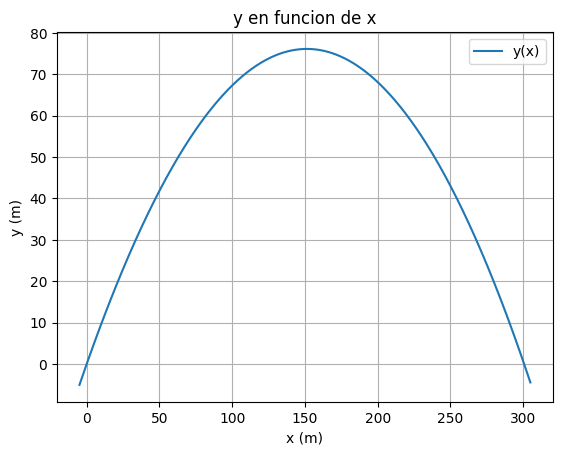

In [18]:
# Punto 2
# Definimos nuestros parametros
theta = 45
v0 = 55
b = 0.005
g = 9.8

# Hacemos primero la grafica para visualizar donde debe encontrarse la raiz
R1 = np.linspace(-5, 305,10000)

plt.figure()
plt.title('y en funcion de x')
plt.plot(R1, f(R1, theta, v0, b, g), label = 'y(x)')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.show()

In [19]:
# Haremos el calculo del cero de f usando el metodo de la secante

print(f'El alcance maximo es de {sc.optimize.newton(f, 200, args = (theta, v0, b, g)): .5} m')

El alcance maximo es de  300.69 m


In [20]:
# Punto 3
# Haremos la comparacion con el metodo de punto fijo

def w(R, theta, v0, b, g):
  theta = np.deg2rad(theta)
  v0x = v0*np.cos(theta)
  v0y = v0*np.sin(theta)

  a = (g/b) + v0y
  c = (a * R) / v0x
  d = g / b**2
  e = R * b / v0x
  f = 1 - e
  h = d * np.log(f)

  y = c + h
  return R - y


print(f'El alcance maximo es de {sc.optimize.fixed_point(w, 350, args = (theta, v0, b, g)): .5} m')

El alcance maximo es de  300.69 m


In [21]:
# Definimos el R como el cero obtenido
R = sc.optimize.fixed_point(w, 350, args = (theta, v0, b, g))

theta = 45

# Definimos tv como funcion de theta, v0 y b
def tv(R, theta, v0, b):
  theta = np.deg2rad(theta)
  v0x = v0*np.cos(theta)
  a = -(1/b)
  c = np.log(1 - ((R*b) / v0x))
  tv = a * c
  return tv

print(f'El tiempo de vuelo fue de {tv(R, theta, v0, b): .3} s')

El tiempo de vuelo fue de  7.89 s


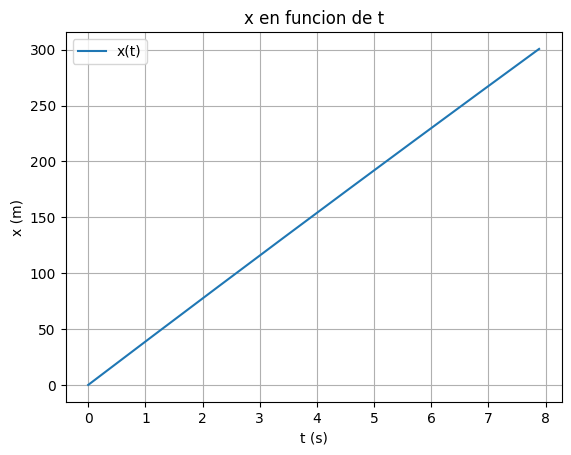

In [22]:
# Punto 4
# Definimos nuevamente nuestros parametros
theta = 45
v0 = 55
b = 0.005
g = 9.8

# Definimos x como funcion de t
def x(theta, v0, b, t):
  theta = np.deg2rad(theta)
  v0x = v0*np.cos(theta)
  a = v0x / b
  c = 1 - np.exp(-(b*t))
  x = a*c

  return x

# Definimos los valores de t hasta que alcance el tiempo de vuelo
t = np.linspace(0, tv(R, theta, v0, b), 1000)

plt.figure()
plt.title('x en funcion de t')
plt.plot(t, x(theta, v0, b, t), label = 'x(t)')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.grid()
plt.show()

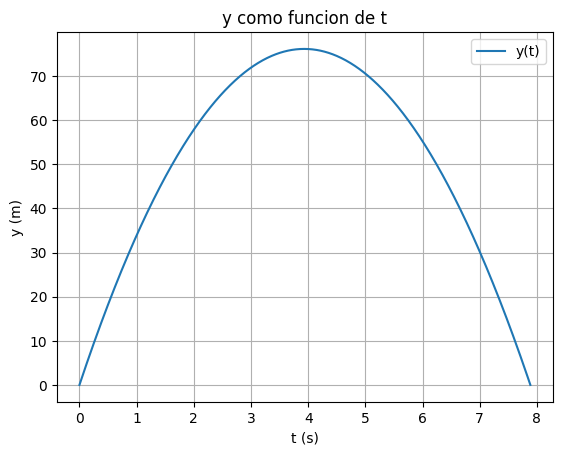

In [23]:
# Definimos a y como funcion de t
def y(theta, v0, b, t, g):
  theta = np.deg2rad(theta)
  v0y = v0*np.sin(theta)
  a = 1/b
  c = g/b + v0y
  d = (1 - np.exp(-(b*t)))
  e = g*t/b
  f = a * c * d

  y = f - e
  return y


# Graficamos
plt.figure()
plt.title('y como funcion de t')
plt.plot(t, y(theta, v0, b, t, g), label = 'y(t)')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.grid()
plt.show()

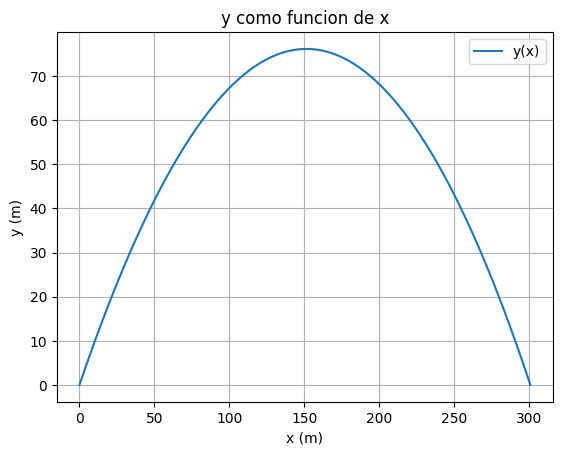

In [24]:
# Graficamos a y como funcion de x
plt.figure()
plt.title('y como funcion de x')
plt.plot(x(theta, v0, b, t), y(theta, v0, b, t, g), label = 'y(x)')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.show()

In [25]:
# Punto 5
# Definimos nuestros parametros

thetan = np.arange(5, 90, 5)
v0n = 40
bn = 0.009

x1 = np.linspace(0, 200, 10000)

# Realizamos un ciclo para calcular los alcances maximos y tiempos de vuelo para cada theta
for i in thetan:
  x0 = i + 50
  r = sc.optimize.newton(f, x0, args = (i, v0n, bn, g))
  print(f'El alcance maximo para theta = {i} es de {r:.4} m y el tiempo de vuelo es {tv(r, i, v0n, bn):.3} s')

El alcance maximo para theta = 5 es de 28.23 m y el tiempo de vuelo es 0.711 s
El alcance maximo para theta = 10 es de 55.37 m y el tiempo de vuelo es 1.41 s
El alcance maximo para theta = 15 es de 80.61 m y el tiempo de vuelo es 2.11 s
El alcance maximo para theta = 20 es de 103.2 m y el tiempo de vuelo es 2.78 s
El alcance maximo para theta = 25 es de 122.5 m y el tiempo de vuelo es 3.43 s
El alcance maximo para theta = 30 es de 138.0 m y el tiempo de vuelo es 4.06 s
El alcance maximo para theta = 35 es de 149.2 m y el tiempo de vuelo es 4.65 s
El alcance maximo para theta = 40 es de 155.9 m y el tiempo de vuelo es 5.21 s
El alcance maximo para theta = 45 es de 157.8 m y el tiempo de vuelo es 5.72 s
El alcance maximo para theta = 50 es de 154.9 m y el tiempo de vuelo es 6.2 s
El alcance maximo para theta = 55 es de 147.5 m y el tiempo de vuelo es 6.62 s
El alcance maximo para theta = 60 es de 135.6 m y el tiempo de vuelo es 7.0 s
El alcance maximo para theta = 65 es de 119.7 m y el t

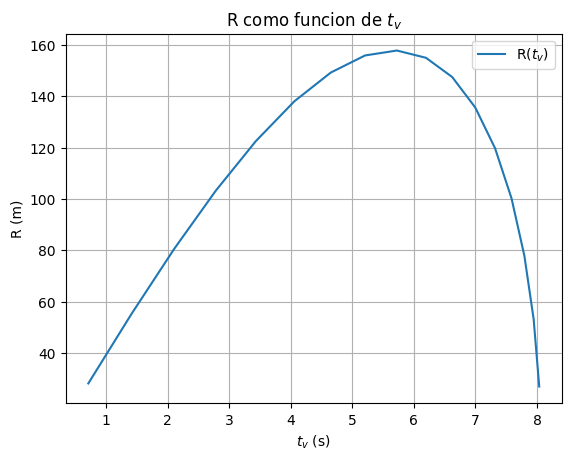

In [26]:
# Punto 6
tv1 = []
R2 = []

for i in thetan:
  x0 = i + 50
  r = sc.optimize.newton(f, x0, args = (i, v0n, bn, g))
  t = tv(r, i, v0n, bn)
  R2.append(r)
  tv1.append(t)

plt.figure()
plt.title('R como funcion de $t_{v}$')
plt.plot(tv1, R2, label = 'R($t_{v}$)')
plt.legend()
plt.xlabel('$t_{v}$ (s)')
plt.ylabel('R (m)')
plt.grid()
plt.show()

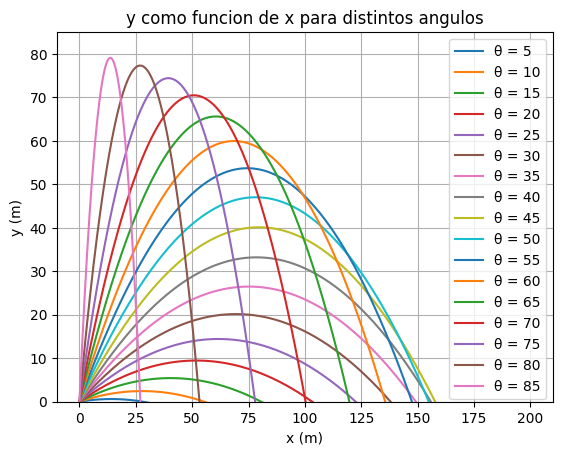

In [27]:
# Punto 7
x1 = np.linspace(0, 200, 10000)

for i in thetan:
  plt.title('y como funcion de x para distintos angulos')
  plt.plot(x1, f(x1, i, v0n, bn, g), label = f'θ = {i}')
  plt.legend()
  plt.ylim(0,85)
  plt.xlabel('x (m)')
  plt.ylabel('y (m)')
  plt.grid()